<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Forecasting(Airlines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
path = r"/content/Airlines+Data.xlsx"

In [3]:
data = pd.read_excel(path)

In [4]:
data['Month'] = pd.to_datetime(data['Month'])
data['Year'] = data['Month'].dt.year
data['Month'] = data['Month'].dt.month

In [5]:
data.describe()

,Month,Passengers,Year
count,96.000000,96.000000,96.000000
mean,6.500000,213.708333,1998.500000
std,3.470174,71.918216,2.303316
min,1.000000,104.000000,1995.000000
25%,3.750000,156.000000,1996.750000
50%,6.500000,200.000000,1998.500000
75%,9.250000,264.750000,2000.250000
max,12.000000,413.000000,2002.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Month       96 non-null     int32
 1   Passengers  96 non-null     int64
 2   Year        96 non-null     int32
dtypes: int32(2), int64(1)
memory usage: 1.6 KB


In [7]:
data.head()

,Month,Passengers,Year
0,1,112,1995
1,2,118,1995
2,3,132,1995
3,4,129,1995
4,5,121,1995


In [8]:
data.columns

Index(['Month', 'Passengers', 'Year'], dtype='object')

In [9]:
data.isnull().sum()

Month         0
Passengers    0
Year          0
dtype: int64

<Axes: >

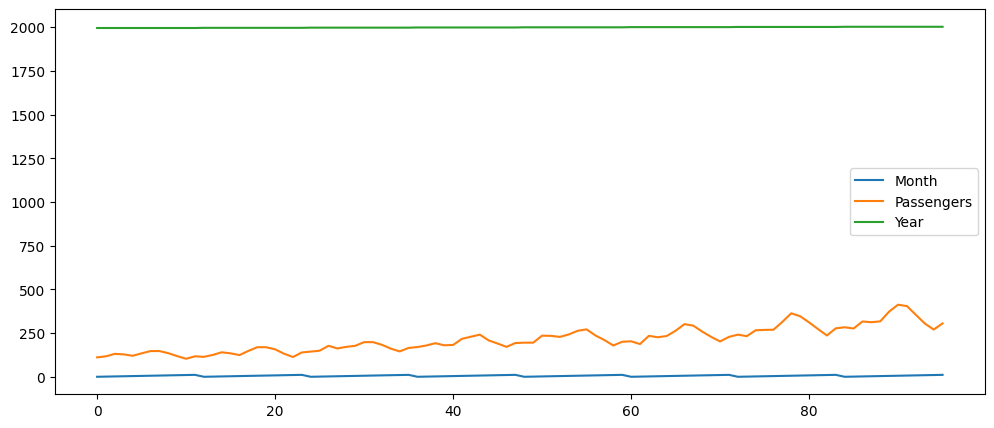

In [10]:

data.plot(figsize=(12,5))

In [11]:

data.dtypes

Month         int32
Passengers    int64
Year          int32
dtype: object

In [12]:
data.columns

Index(['Month', 'Passengers', 'Year'], dtype='object')

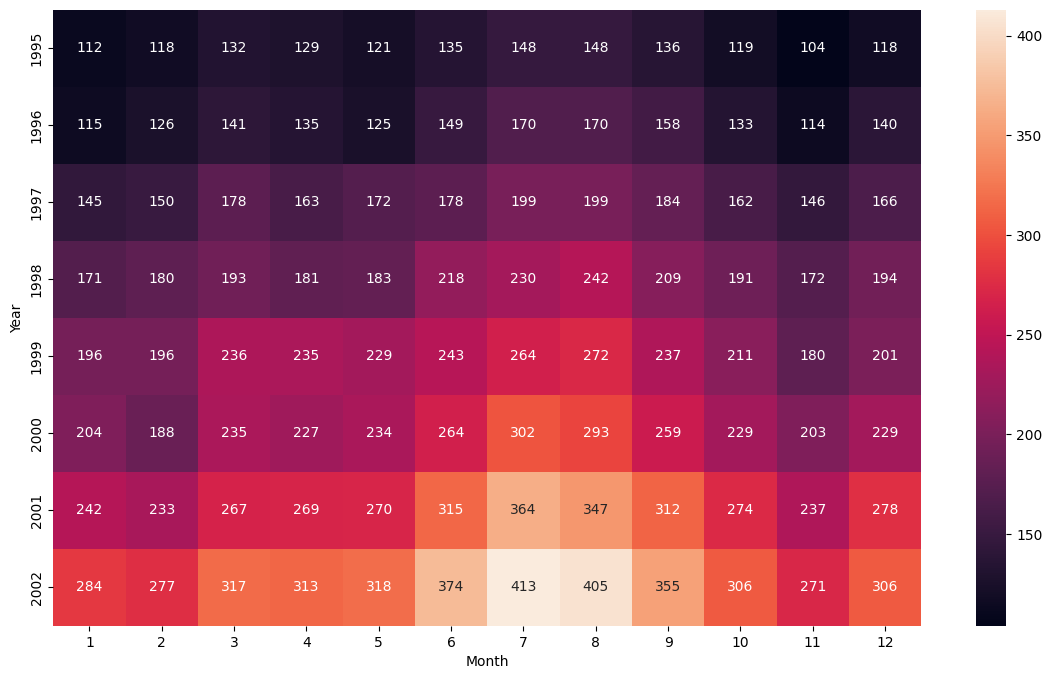

In [13]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=data,values='Passengers',index='Year',columns='Month',aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

<Axes: xlabel='Year', ylabel='Passengers'>

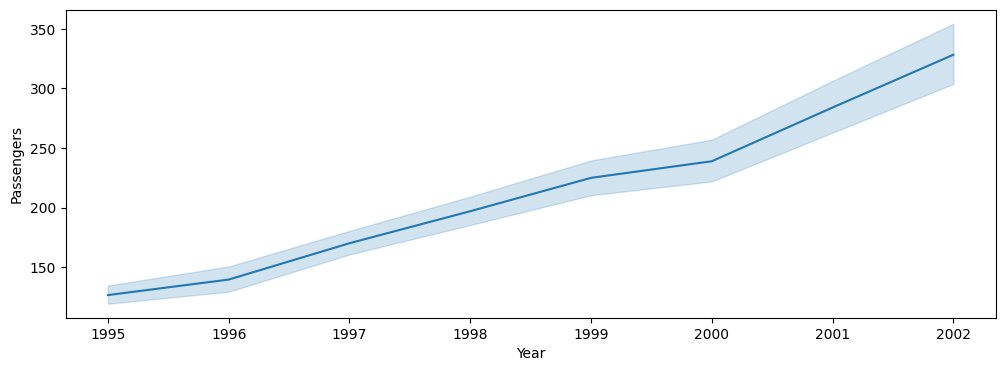

In [14]:
plt.figure(figsize=(12,4))
sns.lineplot(x='Year', y='Passengers', data=data)

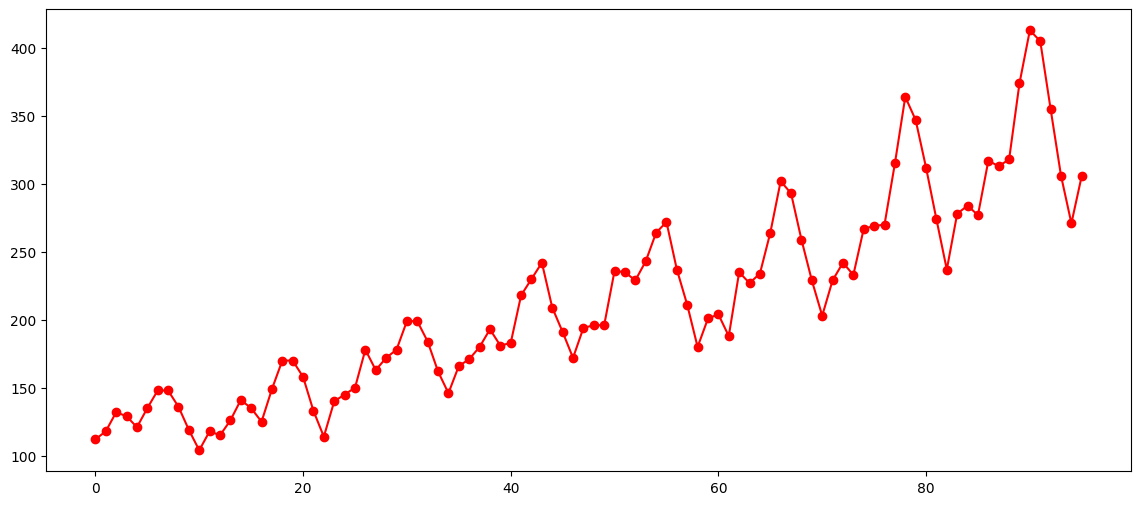

In [15]:
data['Passengers'].plot(figsize=(14,6),color='red',marker='o')
plt.show()

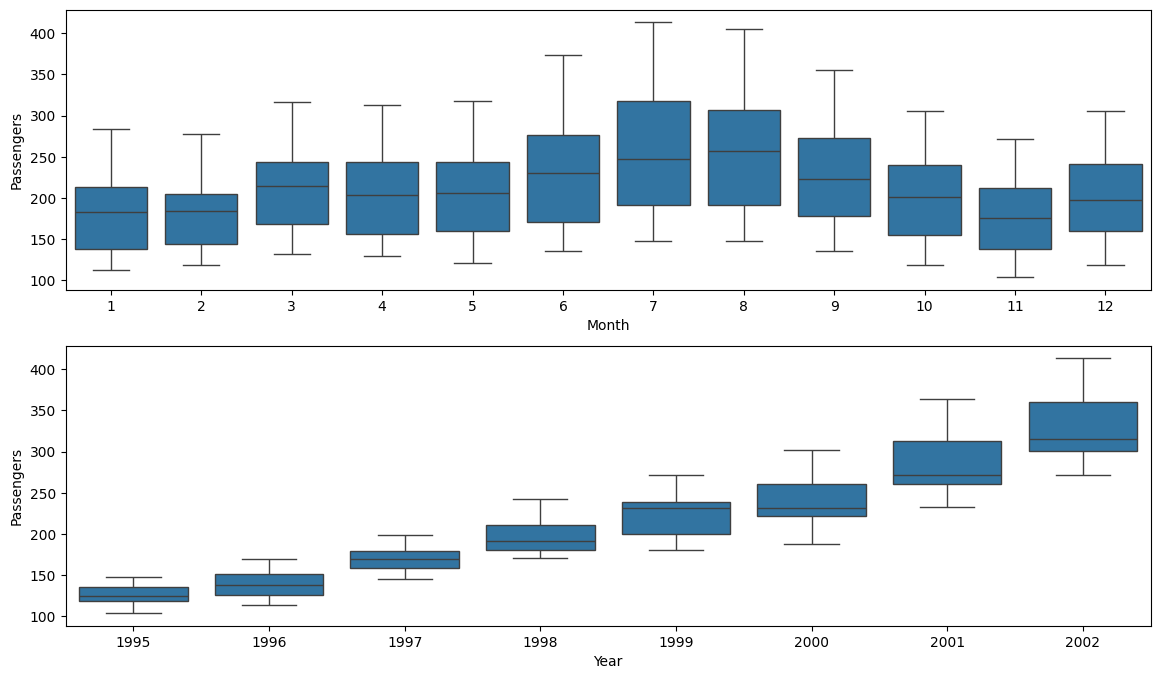

In [16]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="Month", y="Passengers", data=data)
plt.subplot(212)
sns.boxplot(x="Year", y="Passengers", data=data)
plt.show()

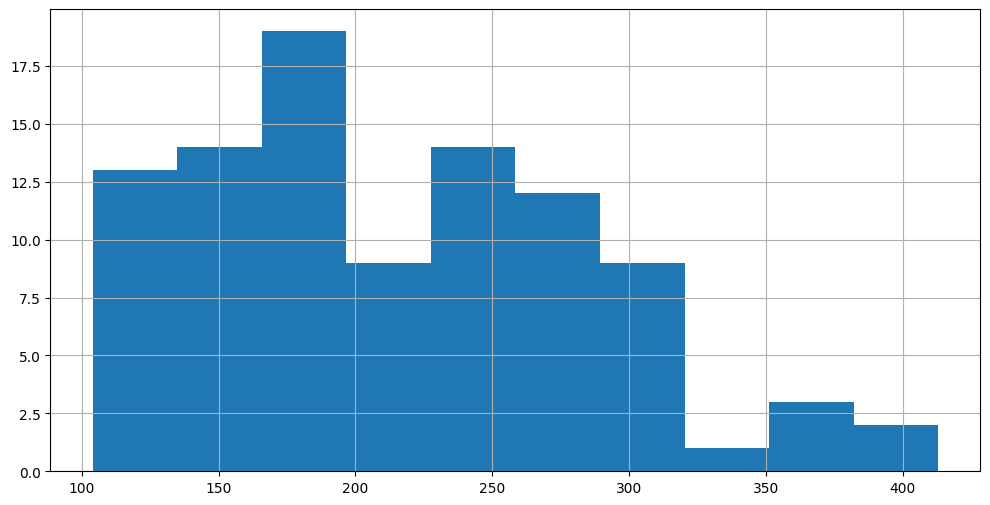

In [17]:
data.Passengers.hist(figsize=(12,6))
plt.show()

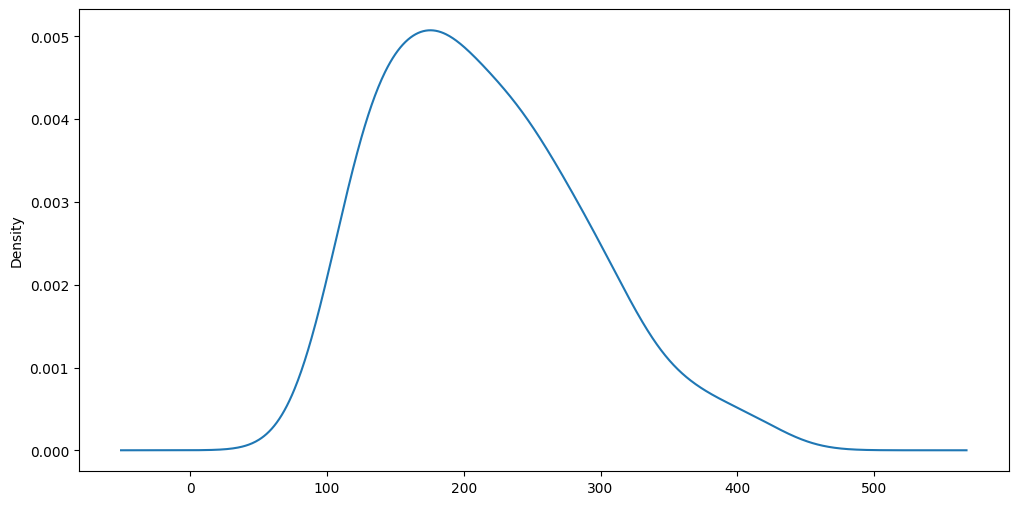

In [18]:
data.Passengers.plot(kind='kde', figsize=(12,6))
plt.show()

In [19]:
dummy_vars = pd.get_dummies(data['Month'], prefix='Month')
data = pd.concat([data, dummy_vars], axis=1)

In [20]:
X = data.drop(['Month', 'Year', 'Passengers'], axis=1)
y = data['Passengers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_pred, squared=False)
print("Linear Regression RMSE:", linear_reg_rmse)

Linear Regression RMSE: 83.4886219792853


In [22]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
tree_reg_pred = tree_reg.predict(X_test)
tree_reg_rmse = mean_squared_error(y_test, tree_reg_pred, squared=False)
print("Decision Tree Regression RMSE:", tree_reg_rmse)

Decision Tree Regression RMSE: 80.63539626937585


In [23]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
forest_reg_pred = forest_reg.predict(X_test)
forest_reg_rmse = mean_squared_error(y_test, forest_reg_pred, squared=False)
print("Random Forest Regression RMSE:", forest_reg_rmse)

Random Forest Regression RMSE: 79.69377426609906


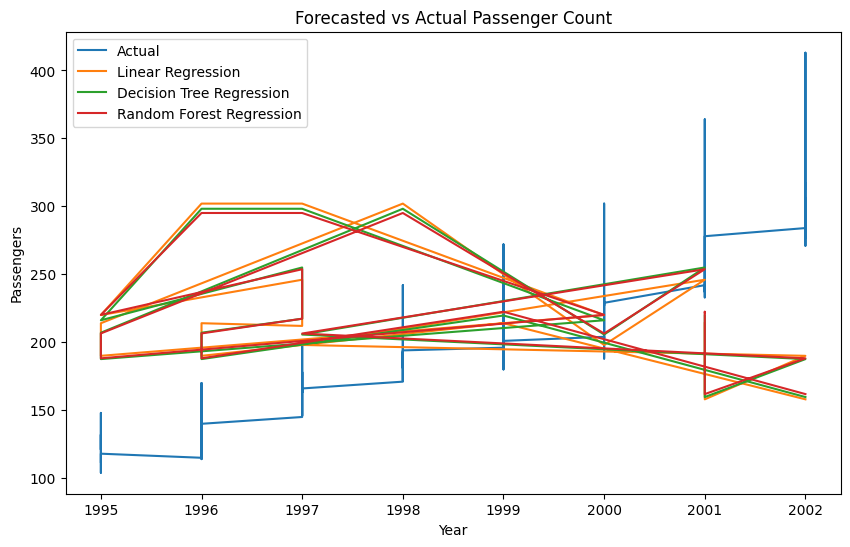

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Passengers'], label='Actual')
plt.plot(data['Year'].iloc[X_test.index], linear_reg_pred, label='Linear Regression')
plt.plot(data['Year'].iloc[X_test.index], tree_reg_pred, label='Decision Tree Regression')
plt.plot(data['Year'].iloc[X_test.index], forest_reg_pred, label='Random Forest Regression')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Forecasted vs Actual Passenger Count')
plt.legend()
plt.show()